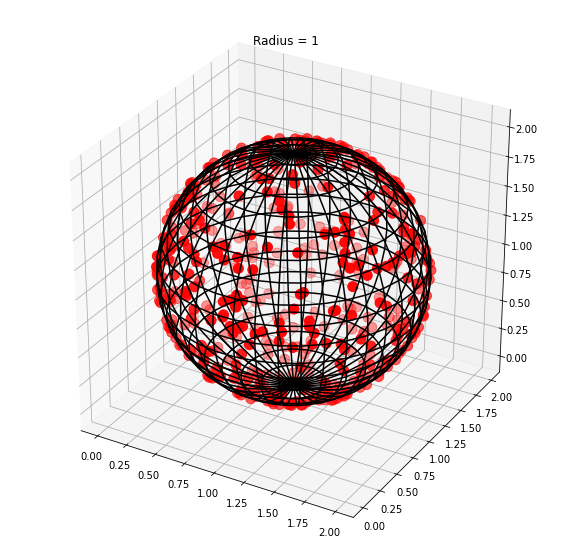

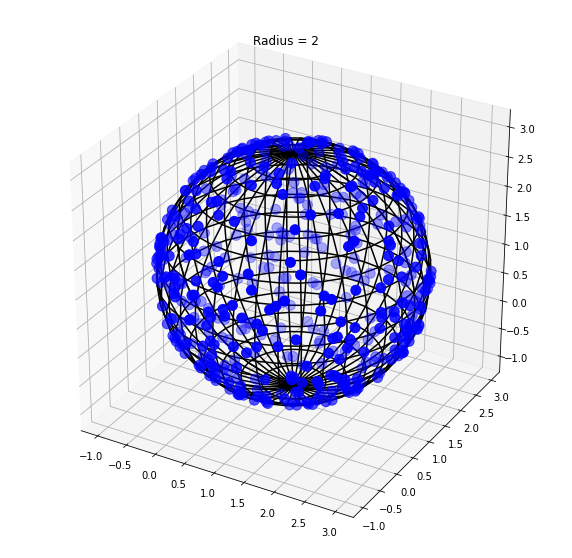

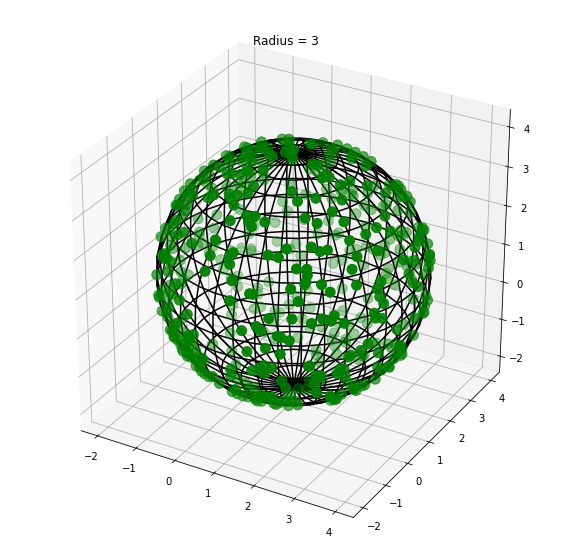

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def sample_spherical(npoints, r , centre ,ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec = vec/np.linalg.norm(vec, axis=0)
    return r*vec + centre
def sphere(r):
    phi = np.linspace(0, np.pi, 20)
    theta = np.linspace(0, 2 * np.pi, 40)
    x = r*np.outer(np.sin(theta), np.cos(phi)) +1
    y = r*np.outer(np.sin(theta), np.sin(phi))+1
    z = r*np.outer(np.cos(theta), np.ones_like(phi))+1
    return x,y,z
x1, y1, z1 = sample_spherical(500,1,1)
X1,Y1,Z1 = sphere(1)

x2, y2, z2 = sample_spherical(500,2,1)
X2,Y2,Z2 = sphere(2)

x3, y3, z3 = sample_spherical(500,3,1)
X3,Y3,Z3 = sphere(3)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'},figsize=(10,10))
ax.plot_wireframe(X1, Y1, Z1, color='k', rstride=1, cstride=1)
ax.scatter(x1, y1, z1, s=100, c='r', zorder=10)
plt.title("Radius = 1")
plt.show()

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'},figsize=(10,10))
ax.plot_wireframe(X2, Y2, Z2, color='k', rstride=1, cstride=1)
ax.scatter(x2, y2, z2, s=100, c='b', zorder=10)
plt.title("Radius = 2")
plt.show()

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'},figsize=(10,10))
ax.plot_wireframe(X3, Y3, Z3, color='k', rstride=1, cstride=1)
ax.scatter(x3, y3, z3, s=100, c='g', zorder=10)
plt.title("Radius = 3")
plt.show()

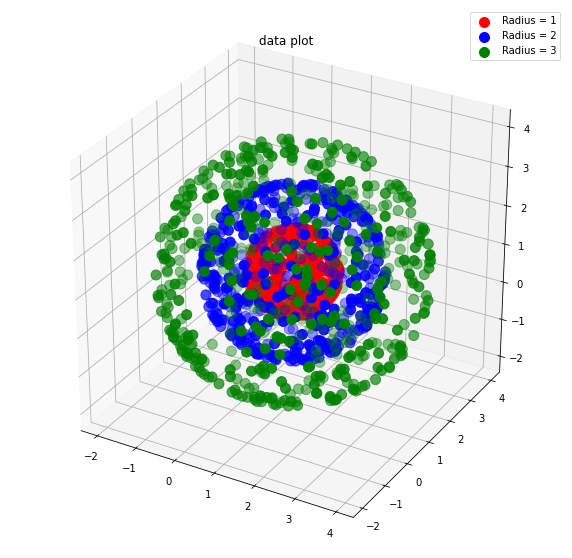

In [13]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'},figsize=(10,10))
ax.scatter(x1, y1, z1, s=100, c='r', zorder=10,label="Radius = 1")
ax.scatter(x2, y2, z2, s=100, c='b', zorder=10,label="Radius = 2")
ax.scatter(x3, y3, z3, s=100, c='g', zorder=10,label="Radius = 3")
plt.title("data plot")
ax.legend()
plt.show()

In [0]:
#Formation of vector
vec = []
for i in range(len(x1)):
    vec.append([x1[i],y1[i],z1[i]])
    vec.append([x2[i],y2[i],z2[i]])
    vec.append([x3[i],y3[i],z3[i]])
vec = np.array(vec)
np.random.shuffle(vec)

#Getting the labels
label = []
color = []
for i in range(len(vec)):
    ll = np.round(np.sqrt((np.sum((vec[i]-1)**2))))-1
    if(ll == 0.0):
        #print("yes0 " , ll)
        color.append('r')
    elif ll == 1.0:
        #print("yes1 " , ll)
        color.append('b')
    else:
        #print("yes2 " , ll)
        color.append('g')
    label.append(ll)

In [0]:
#scaling , making mean = 0 and std = 1
from sklearn.preprocessing import StandardScaler
vec_nor = StandardScaler().fit_transform(vec)

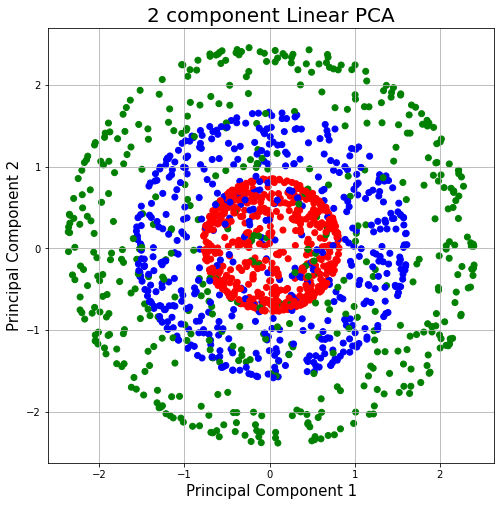

array([0.34632562, 0.33301743])

In [16]:
#Applying the Linear PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vec_pca = pca.fit_transform(vec_nor)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component Linear PCA', fontsize = 20)
ax.scatter(vec_pca[:,0],vec_pca[:,1], c = color)
ax.grid()
plt.show()
#Percentage of variance explained by each of the selected components.
pca.explained_variance_ratio_

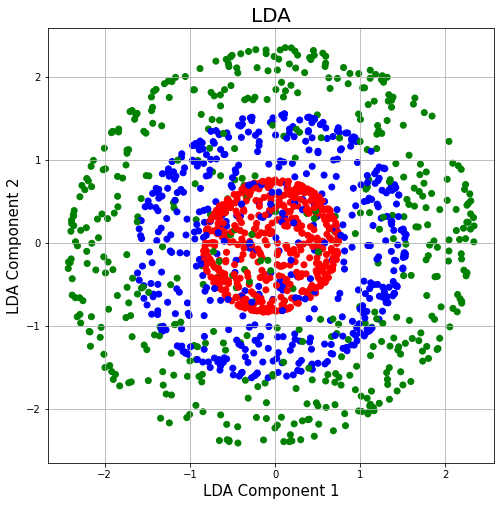

array([0.86569537, 0.13430463])

In [17]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(vec, label)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA Component 1', fontsize = 15)
ax.set_ylabel('LDA Component 2', fontsize = 15)
ax.set_title('LDA', fontsize = 20)
ax.scatter(X_lda[:,0],X_lda[:,1], c = color)
ax.grid()
plt.show()
lda.explained_variance_ratio_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


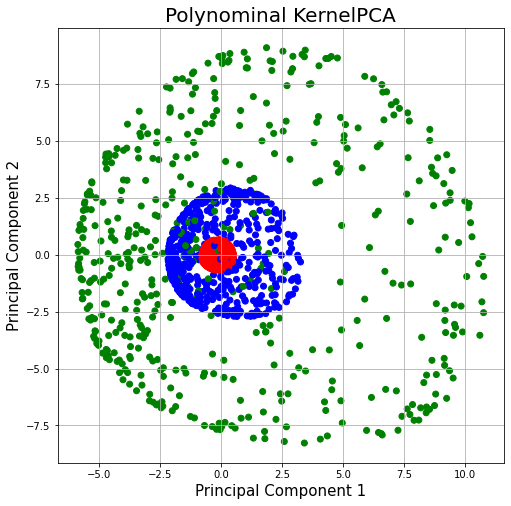

In [18]:
#Applying Kernel PCA
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components=2,kernel = 'poly',degree=5)
vec_polypca = pca.fit_transform(vec_nor)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Polynominal KernelPCA', fontsize = 20)
ax.scatter(vec_polypca[:,0],vec_polypca[:,1], c = color)
ax.grid()
plt.show()

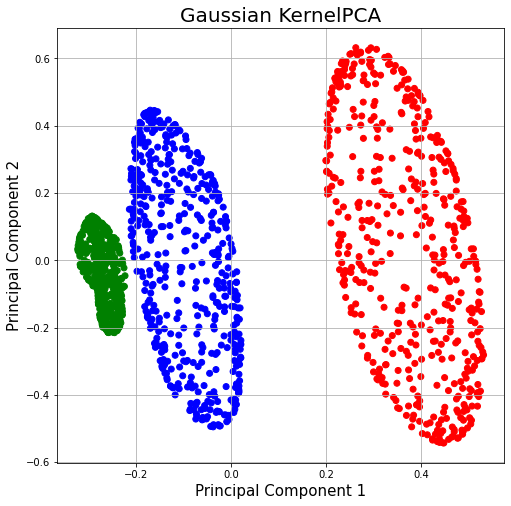

In [19]:
#Applying Kernel PCA
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components=2,kernel = 'rbf',gamma=0.8)
vec_polypca = pca.fit_transform(vec_nor)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Gaussian KernelPCA', fontsize = 20)
ax.scatter(vec_polypca[:,0],vec_polypca[:,1], c = color)
ax.grid()
plt.show()